In [32]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

# Visualize the datasets and manage the dataset

In [2]:
edges = pd.read_csv("wikigraph_reduced.csv", sep="\t", usecols = ["0", "1"])
edges.columns = ["source", "dest"]
edges.head()

,source,dest
0,95,1185516
1,108,1059989
2,108,1062426
3,108,1161925
4,134,541222


Read each line of the "wiki-topcats-categories.txt" and create the dataset

In [3]:
categories = pd.read_csv("wiki-topcats-categories.txt", sep=";", names = ["Category", "Pages List"])
categories["Category"] = categories.Category.apply(lambda x: x[9:])
categories["Pages List"] = categories["Pages List"].apply(lambda x: x.split())
categories

,Category,Pages List
0,Buprestoidea,"[301, 302, 303, 304, 305, 306, 307, 308, 309, ..."
1,People_from_Worcester,"[1056, 1057, 1058, 1059, 1060, 60971, 76515, 7..."
2,Skin_conditions_resulting_from_physical_factors,"[971, 973, 1166, 1167, 1168, 1169, 1170, 1171,..."
3,Visual_kei_bands,"[1297, 1300, 1311, 1312, 1313, 1314, 1315, 131..."
4,Japanese_rock_music_groups,"[1297, 1300, 1313, 1314, 1315, 1316, 1319, 132..."
...,...,...
17359,British_science_fiction_novels,"[16110, 24545, 39814, 67923, 108629, 108630, 1..."
17360,Television_soundtracks,"[1117, 110192, 110376, 110377, 110380, 110395,..."
17361,Diptera_of_North_America,"[279, 280, 283, 31110, 31129, 31133, 31138, 31..."
17362,Diptera_of_Asia,"[279, 31129, 31133, 31134, 31135, 31136, 31137..."


You will notice that one article might belong to a single category or multiple ones. In the case of multiple appearance, you break the ties uniformly at random. Please, do it before solving any task in the homework.

In [4]:
cats = list(categories["Category"])
pages_list = list(categories["Pages List"])

create a vocabulary in order to create the clean categories without replicates.

In [5]:
nodes = {}
for i, list_pages in enumerate(pages_list):
    for node in list_pages:
        if node not in nodes:
            nodes[node] = []
        nodes[node].append(i)

Choose uniformly at random a category where the page will be belong, then create the dictionary.

In [6]:
import random

nodes2 = defaultdict(list)
for node in nodes.keys():
    cat = random.sample(nodes[node], 1)
    nodes2[cat[0]].append(node)

In [11]:
new_categories = pd.DataFrame()
new_categories['category'] = nodes2.keys()
new_categories['pages list'] = nodes2.values()

def set_category(x, categories):
    return categories.loc[x, "Category"]
    
new_categories["category"] = new_categories.category.apply(lambda x: set_category(x, categories)) # set the category not the integer value
new_categories

,category,pages list
0,Buprestoidea,"[301, 302, 304, 305, 306, 307, 308, 309, 310, ..."
1,Insect_families,"[303, 31472, 877911, 1696130, 31636, 1695202, ..."
2,English_engineers,"[1056, 48859, 437620, 1094717, 1470927, 172488..."
3,People_from_Worcester,"[1057, 1059, 1060, 89734, 158412, 166087, 3487..."
4,Alumni_of_Loughborough_University,"[1058, 78683, 96632, 1527804, 1034922, 1568821..."
...,...,...
17351,Municipalities_in_Navarre,"[130242, 130269, 445210, 445236, 1781142, 1781..."
17352,Populated_places_in_Navarre,"[444707, 1145160, 1358873, 1781137, 1781138, 1..."
17353,Municipalities_of_South_Tyrol,"[215159, 443945, 943609, 1781498, 1781519, 178..."
17354,Redirects_from_UK_postcode_districts,"[1640637, 1640638, 1788784, 1788785]"


Create the new categories dataset

Read the pages names.

In [8]:
pages_names = pd.read_csv("wiki-topcats-page-names.txt", names=["node name"])
pages_names

pages_names['node'] = [s.split()[0] for s in list(pages_names['node name']) ]
pages_names['name'] = [' '.join(s.split()[1:]) for s in list(pages_names['node name'])]

pages_names = pages_names.set_index("node").drop('node name', axis=1)
pages_names

,name
node,
0,Chiasmal syndrome
1,Kleroterion
2,Pinakion
3,LyndonHochschildSerre spectral sequence
4,Zariski's main theorem
...,...
1791484,Noadiah Russell (Yale founder)
1791485,Cornus officinalis
1791486,Peter Grummitt


# RQ1

Build the graph G=(V, E), where V is the set of articles and E the hyperlinks among them.

In [12]:
import networkx as nx

create the graph

In [37]:
G = nx.Graph()

In [38]:
sources = list(edges['source'])
dests = list(edges['dest'])

for i in range(len(edges)):
    G.add_node(sources[i], name = pages_names.loc[str(sources[i]), 'name']) # source
    G.add_node(dests[i], name = pages_names.loc[str(dests[i]), 'name']) # dest
    
    G.add_edge(sources[i], dests[i], weight=1)

In [43]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 98343\nNumber of edges: 353242\nAverage degree:   7.1839'

In [46]:
print(f"The number of nodes is: {G.number_of_nodes()} and the number of edges is: {G.number_of_edges()}... instead the average degree of each node is: {nx.}")

The number of nodes is: 98343 and the number of edges is: 353242


In [49]:
if nx.is_directed(G):
    print("The Graph is directed")
else:
    print("The Graph is undirected")

The Graph is undirected


for the graph undirected to understand if the graph is sparse or not, we should use this formula:

$D = \frac{2|E|}{|V|(|V|-1)}$

a dense graph is a graph in which the number of edges is close to the maximal number of edges.

In [56]:
# we can use also nx.density(G)
D = (2*G.number_of_edges())/(G.number_of_nodes()*(G.number_of_nodes()-1))
print(f"The graph density is: {D}, so the graph is sparse")

The graph density is: 7.30499363367226e-05, so the graph is sparse


the average of link per article is..

In [92]:
degrees = dict(nx.degree(G))
sum(degrees.values())/float(len(G))

7.183876839225975

Visualize the **nodes degree distribution**

In [66]:
degrees = dict(nx.degree(G))

NodeDistro = pd.DataFrame()

NodeDistro['node'] = degrees.keys()
NodeDistro['degree'] = degrees.values()

,node,degree
0,95,1
1,1185516,9
2,108,3
3,1059989,31
4,1062426,30
...,...,...
98338,1790166,3
98339,1790616,4
98340,1791482,1
98341,1791484,1


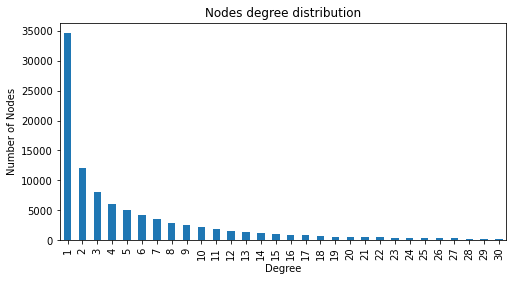

In [90]:
NodeDistro.groupby([NodeDistro.degree]).node.count().head(30).plot.bar(figsize=(8,4))
    
#create the plot
plt.grid()
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Nodes degree distribution')
plt.grid(b=None)
plt.show()